In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df = pd.read_csv('advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,112.4,18.7,63.5,12.7
1,285.2,47.5,7.1,20.8
2,219.6,36.6,9.5,18.2
3,179.6,29.9,74.2,16.5
4,46.8,7.8,3.3,10.6


In [6]:
x = df["TV"]
y = df["Sales"]

In [12]:
k = 10
print("TV\tSales")
for i,j in zip(x,y):
    print(str(i) + "\t" + str(j))
    k -= 1
    if k == 0:
        break

TV	Sales
112.4	12.7
285.2	20.8
219.6	18.2
179.6	16.5
46.8	10.6
46.8	9.5
17.4	7.9
259.8	21.0
180.3	15.7
212.4	17.4


In [16]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
reg_model = LinearRegression()
reg_model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
reg_model.intercept_[0]

np.float64(7.092366253092093)

In [18]:
reg_model.coef_[0][0]

np.float64(0.049836614027340034)

In [19]:
reg_model.intercept_[0]+reg_model.coef_[0][0]*150


np.float64(14.5678583571931)

In [20]:
reg_model.intercept_[0]+reg_model.coef_[0][0]*500

np.float64(32.01067326676211)

In [21]:
df. describe().T

,count,mean,std,min,25%,50%,75%,max
TV,189.0,156.484127,84.168333,4.4,91.4,163.7,221.3,294.4
Radio,189.0,26.082011,14.025095,0.7,15.2,27.3,36.9,49.1
Newspaper,189.0,46.753968,28.766129,1.3,22.2,46.0,74.1,99.9
Sales,189.0,14.891005,4.280420,5.8,11.8,15.6,18.2,22.4


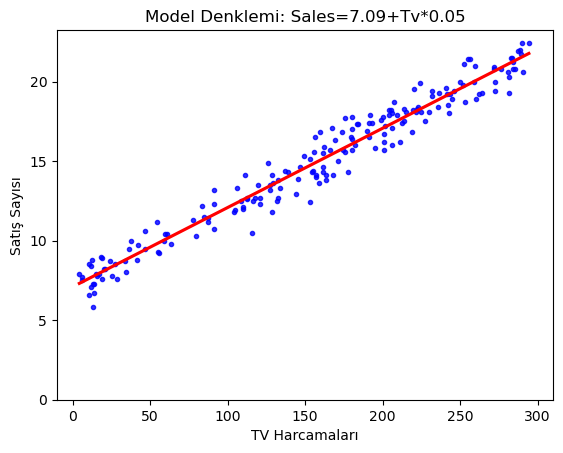

In [22]:
g=sns.regplot(x="TV", y="Sales", data=df, scatter_kws={'color':'b', 's': 9},
              ci=False, color="r")
g.set_title(f"Model Denklemi: Sales={round(reg_model.intercept_[0], 2)}+Tv*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()